<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Graph-Algorithms:-Fundamentals" data-toc-modified-id="Graph-Algorithms:-Fundamentals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Graph Algorithms: Fundamentals</a></span><ul class="toc-item"><li><span><a href="#Chang-Liu" data-toc-modified-id="Chang-Liu-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Chang Liu</a></span><ul class="toc-item"><li><span><a href="#2021-02-20" data-toc-modified-id="2021-02-20-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>2021-02-20</a></span></li></ul></li></ul></li><li><span><a href="#Topics:" data-toc-modified-id="Topics:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Topics:</a></span><ul class="toc-item"><li><span><a href="#Coloring-Problems" data-toc-modified-id="Coloring-Problems-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Coloring Problems</a></span></li><li><span><a href="#Bipartite-Graph-(LC-785):" data-toc-modified-id="Bipartite-Graph-(LC-785):-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Bipartite Graph (LC 785):</a></span></li><li><span><a href="#Examples:" data-toc-modified-id="Examples:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Examples:</a></span></li></ul></li><li><span><a href="#Graph-Connectivity" data-toc-modified-id="Graph-Connectivity-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Graph Connectivity</a></span><ul class="toc-item"><li><span><a href="#Union-Find" data-toc-modified-id="Union-Find-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Union-Find</a></span></li><li><span><a href="#Implementation-of-Union-Find" data-toc-modified-id="Implementation-of-Union-Find-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Implementation of Union-Find</a></span></li><li><span><a href="#Example:-Friend's-Circle-(LC:-547)" data-toc-modified-id="Example:-Friend's-Circle-(LC:-547)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Example: Friend's Circle (LC: 547)</a></span></li><li><span><a href="#Complexity-Analysis:" data-toc-modified-id="Complexity-Analysis:-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Complexity Analysis:</a></span></li></ul></li><li><span><a href="#Shortest-Paths" data-toc-modified-id="Shortest-Paths-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Shortest Paths</a></span><ul class="toc-item"><li><span><a href="#Graph-Terminology" data-toc-modified-id="Graph-Terminology-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Graph Terminology</a></span></li><li><span><a href="#Example:-cheapest-cost-to-fly" data-toc-modified-id="Example:-cheapest-cost-to-fly-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Example: cheapest cost to fly</a></span></li><li><span><a href="#Priority-Queue" data-toc-modified-id="Priority-Queue-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Priority Queue</a></span><ul class="toc-item"><li><span><a href="#Pseudo-code" data-toc-modified-id="Pseudo-code-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Pseudo code</a></span></li><li><span><a href="#Runtime-analysis:" data-toc-modified-id="Runtime-analysis:-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Runtime analysis:</a></span></li></ul></li></ul></li><li><span><a href="#Practice-problems:" data-toc-modified-id="Practice-problems:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Practice problems:</a></span></li></ul></div>

# Graph Algorithms: Fundamentals
## Chang Liu
### 2021-02-20

In [14]:
from IPython.display import Image

# Topics:
1. A special case of coloring problems: bipartite graph
2. Union-Find: an efficient algorithm to find connected components
3. Shortest paths (non-negative weight, single source): Dijkstra's algorithm


## Coloring Problems

In general, **K-coloring** problem is to find a color to each vertex in a undirected graph such that no adjacent vertices share the same color. For $K>=3$, exact computation requires brute force search and would take exponential time, hence making it an **NP-hard** problem. Approximation algorithms have been devised to solve them. For $K=2$, this problem is equivalent to determining whether a graph is bipartite and exactly computable in linear time. We will study this approach using BFS or DFS.


## Bipartite Graph (LC 785):
A graph is **bipartite** if the nodes can be partitioned into two independent sets A and B such that every edge in the graph connects a node in set A and a node in set B.

You are given an undirected graph with $n$ nodes, where each node is numbered between $0$ and $n - 1$. You are given a 2D array graph, where graph$[u]$ is an array of nodes that node $u$ is adjacent to. More formally, for each $v$ in graph$[u]$, there is an undirected edge between node $u$ and node $v$. The graph has the following properties:

There are no self-edges (graph$[u]$ does not contain $u$).
There are no parallel edges (graph$[u]$ does not contain duplicate values).
If v is in graph$[u]$, then $u$ is in graph$[v]$ (the graph is undirected).
The graph may not be connected, meaning there may be two nodes u and v such that there is no path between them.

Return true if and only if it is bipartite.

## Examples:

Output: False


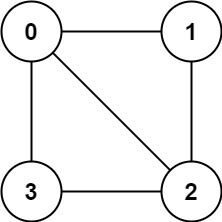

In [226]:
print('Output: False')
Image('bipartite1.jpg', width=200)


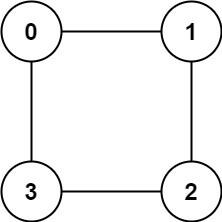

In [221]:
print('Output: True')
Image('bipartite2.jpg', width=200)  

In [45]:
from collections import deque

def isBipartiteDFS(graph):
    """
    :type graph: List[List[int]]
    :rtype: bool
    """
    # use a dict to keep track of visited nodes
    # encode or 'color' states for each node:
    # -1: unvisited; 0: blue color; 1 red color 
    # all nodes initialized to unvisited
    color = {}
    def DFS(source_node):
        for neighbor in graph[source_node]:
            # mark as visited
            if neighbor not in color:
                # a different way to mark different color using bitwise xor
                color[neighbor] = color[source_node] ^ 1 
                # recurse on first unvisited neighbor till the last reachable node
                if not DFS(neighbor):
                    return False
            # exit immediately if a visited neighbor has the same color as source
            elif color[neighbor] == color[source_node]:
                return False
        return True
    
    # traverse the whole graph 
    for source_node in range(len(graph)):
        if source_node not in color:
            # for any reachable node in undirected graph, the source node can be any color. 
            color[source_node] = 0
            if not DFS(source_node):
                return False
    return True

In [46]:
graph = [[1,3],[0,2],[1,3],[0,2]]# [[1,2,3],[0,2],[0,1,3],[0,2]]
isBipartiteDFS(graph)

True

In [47]:
def isBipartiteBFS(graph):
    """
    :type graph: List[List[int]]
    :rtype: bool
    """
    # encode or 'color' states for each node:
    # -1: unvisited; 0: blue color; 1 red color 
    # all nodes initialized to unvisited
    color = [-1] * len(graph)
    
    # traverse all unvisited nodes; unreachable nodes form different subgraphs
    for source_node in range(len(graph)):
        if color[source_node] == -1:
            queue = deque([source_node])      
            # for any reachable node in undirected graph, the source node can be any color. 
            color[source_node] = 0
            # BFS queue
            while queue: 
                current_node = queue.popleft() # first in first out
                for neighbor in graph[current_node]:
                    # color neighbor if unvisited; then mark it as visited
                    if color[neighbor] == -1:
                        # mark the neighbor with a different color
                        color[neighbor] = 1 - color[current_node] 
                        queue.append(neighbor)
                    # exit immediately if a visited neighbor has the same color
                    elif color[current_node] == color[neighbor]:
                        return False
    return True

In [48]:
graph = [[1,3],[0,2],[1,3],[0,2]]# [[1,2,3],[0,2],[0,1,3],[0,2]]
isBipartiteBFS(graph)

True

# Graph Connectivity
Here we study connectivity in a undirected graph. Most of the time, we can use BFS and DFS to solve such problems. However, there is another efficient technique that could potentially outperform them. 

**strongly connected**: a graph is said to be strongly connected if every vertex is reachable from every other vertex.

**weakly connected**: a directed graph is called weakly connected if replacing all of its directed edges with undirected edges produces a connected (undirected) graph.

Such distinction is only valid for directed graphs but today we focus on undirected graphs. 


## Union-Find
1. A union-find data structure is one that stores partitions of disjoint sets of elements, and supports the following operations:
    - make_set(x): create a new set containing element x
    - find(x): find the root of element x
    - union(x, y): merge the two sets storing x and y if they are different
2. A union-find algorithm is one that makes use of efficient operations find and union, usually to detect circles or connected components in a graph. 

## Implementation of Union-Find
1. Doubly-linked list: naive approach 
 Each node has two pointers, one for child and one for parent. A node with no parent is designateed as the head while a node with no child is designated as the tail
 - make_set(node): initialize a lone node
 - find(node, head=True): if head == True, traverse to find the head of a given node; o/w, find the tail of the node
 - union(x, y): find the head of x and the tail of y, link them by their pointers accordingly. 
 
 ##### Complexity Analysis:  
  Clearly, make_set(x) is $O(1)$ for a node; find(x) and union(x, y) are $O(n)$ operations in the worst case for a set of $n$ nodes.

2. Array: element array, index array (and size array if rank is stored)

 - See example below.

## Example: Friend's Circle (LC: 547)

There are N students in a class. Some of them are friends,others are not. Their friendship is transitive; if A is a direct friend of B, and B is a direct friend of C, then A is an indirect friend of C. A friend circle is defined as a group of students who are direct or indirect friends.

The input matrix will have a number of rows and columns equal to the number of students in a class. A cell [i,j] will hold the value 1 if student i and student j are friends; otherwise, the cell will hold the value 0. 


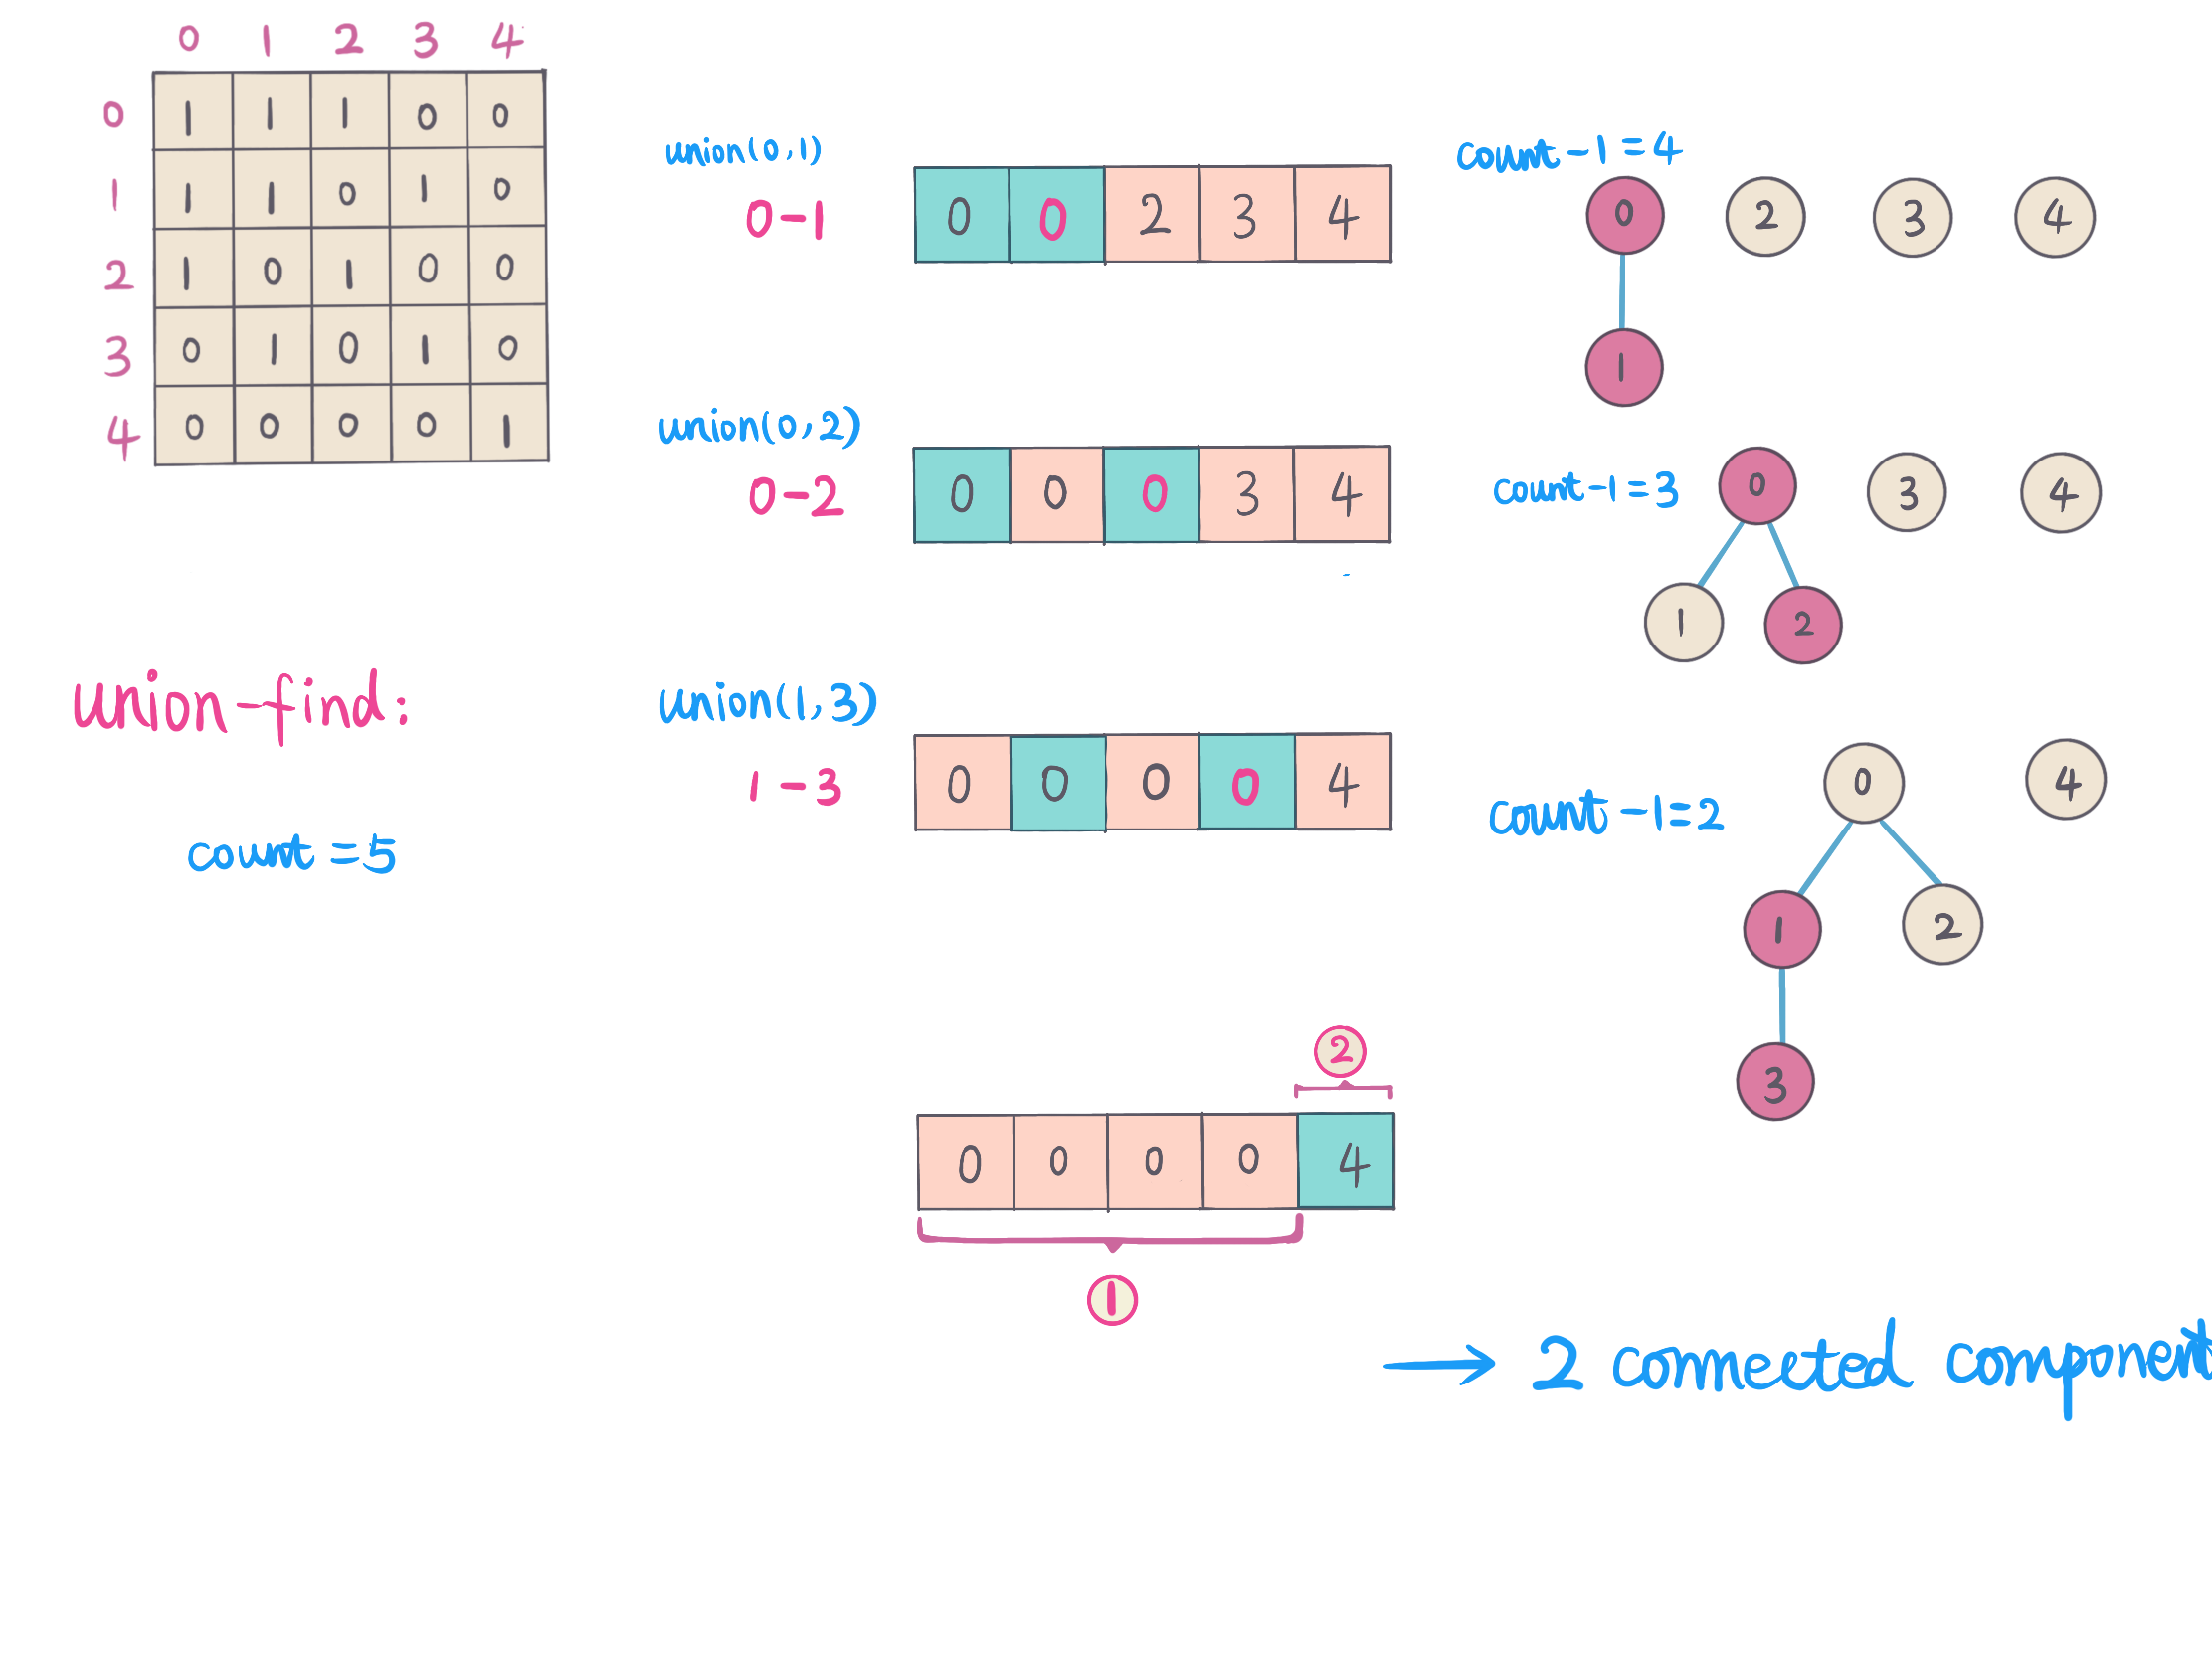

In [84]:
Image('547.friend-circle-uf.png', width=800)


## Complexity Analysis:

- Previously introduced algorithms DFS and BFS applicable for this problem, both with the $O(n^2)$ time and $O(n)$ space where $n$ is the number of nodes. Only difference is traversal order (depth first vs breadth first)
- Union-find with both union by rank and path compression optimizations, it would improve ammortized run time to $O(n + m \alpha(n)) = O(n^2 \alpha(n))$ where $m$ is the number of edges we visited and $\alpha(n)$ is the inverse of Ackermann function. And it can be assumed to be $\alpha(n) \leq 5$ for any real-world problems. Because this factor is very small, it could in practice beat BFS/DFS by a constant factor. In fact, the leetcode server judges that the union find solution is faster than the DFS solution on this problem.
- https://leetcode.com/problems/number-of-provinces/

In [1]:
# DFS approach:

# Recursively finds all students in a friend circle
def DFS(M, n, visited, v):
    for x in range(n):
        # a person is only counted in a friend's circle if that person is 
        # 1) a friend of someone in a circle and 2) is not yet visited  
        if M[v][x] and visited[x] == 0:
            if x != v:
                visited[x] = 1
                DFS(M, n, visited, x)

def findFriendsCirclesDFS(M):
    """
    :type M: List[List[int]]
    :rtype: int
    """
    n = len(M)
    if n==0: 
        return 0
  
    numCircles = 0  # number of friend circles
    
    # keep track of whether a student is already in a friend circle
    visited = [0] * n
    
    # visit each person in order
    for i in range(n):
        if (visited[i] == 0):
            visited[i] = 1  # mark that person as visited
            DFS(M, n, visited, i) # Recursive step to find all friends
            numCircles = numCircles + 1 # only increment circle count if we keep adding new persons
    
    return numCircles



In [12]:

n = 4
friends = [
  [1,1,1,0,0],
  [1,1,0,1,0],
  [1,0,1,0,0],
  [0,1,0,1,0],
  [0,0,0,0,1]
]

print("Number of friend circles:", findFriendsCirclesDFS(friends))


Number of friend circles: 2


In [19]:




def findFriendsCirclesUF(M):
    """
    :type M: List[List[int]]
    :rtype: int
    """
    n = len(M)
    # an index array of parent pointers
    parents = [i for i in range(n)]
    
    sizes = [1] * n

    def union(i, j):
        root_i = find(i)
        root_j = find(j)
        # union by rank:
        # only increment rank of root_j when they have the same rank
        if sizes[root_i] >= sizes[root_j]:
            sizes[root_i] += sizes[root_j]
            root_i, root_j = root_j, root_i
        else:
            sizes[root_j] += sizes[root_i]
        
        parents[root_i] = root_j
        
    def find(i):
        while not parents[i] == i:
            # path compression: flatten the tree by recursively point parents to grandparents
            parents[i] = parents[parents[i]] 
            i = parents[i]
        return i

    for i in range(len(M)):
        for j in range(i+1, len(M)):
            if M[i][j] == 1:
                union(i, j)
    print(sizes)
    print(parents)
    return sum(i == parent for i, parent in enumerate(parents))

In [20]:

n = 4
friends = [
  [1,1,1,0,0],
  [1,1,0,1,0],
  [1,0,1,0,0],
  [0,1,0,1,0],
  [0,0,0,0,1]
]

print("Number of friend circles:", findFriendsCirclesUF(friends))

[4, 1, 1, 1, 1]
[0, 0, 0, 0, 4]
Number of friend circles: 2



# Shortest Paths
Find the shortest paths of a single source node in a undirected graph with non-negative weights on edges. Dijkstra's algorithm is typically used to solve this problem efficiently. This problem has many real-world applications such as map navigation, network routing. It is speculated that Google Map once made use of A* search algorithm, which is an extension to Dijkstra's algorithm. 

## Graph Terminology

**reachable**: a vertex $w$ is reachable from a vertex $v$ if there exists a directed path from $v$ to $w$. 

**path**: a sequence of alternating vetches and edges such that each successive vertex is connected by the edge.

**weighted graph**: a graph with numerical weights assigned to its vertex or edge. 


## Example: cheapest cost to fly

Given the following graph, what is the cheapest way to fly from Memphis to Nashville?


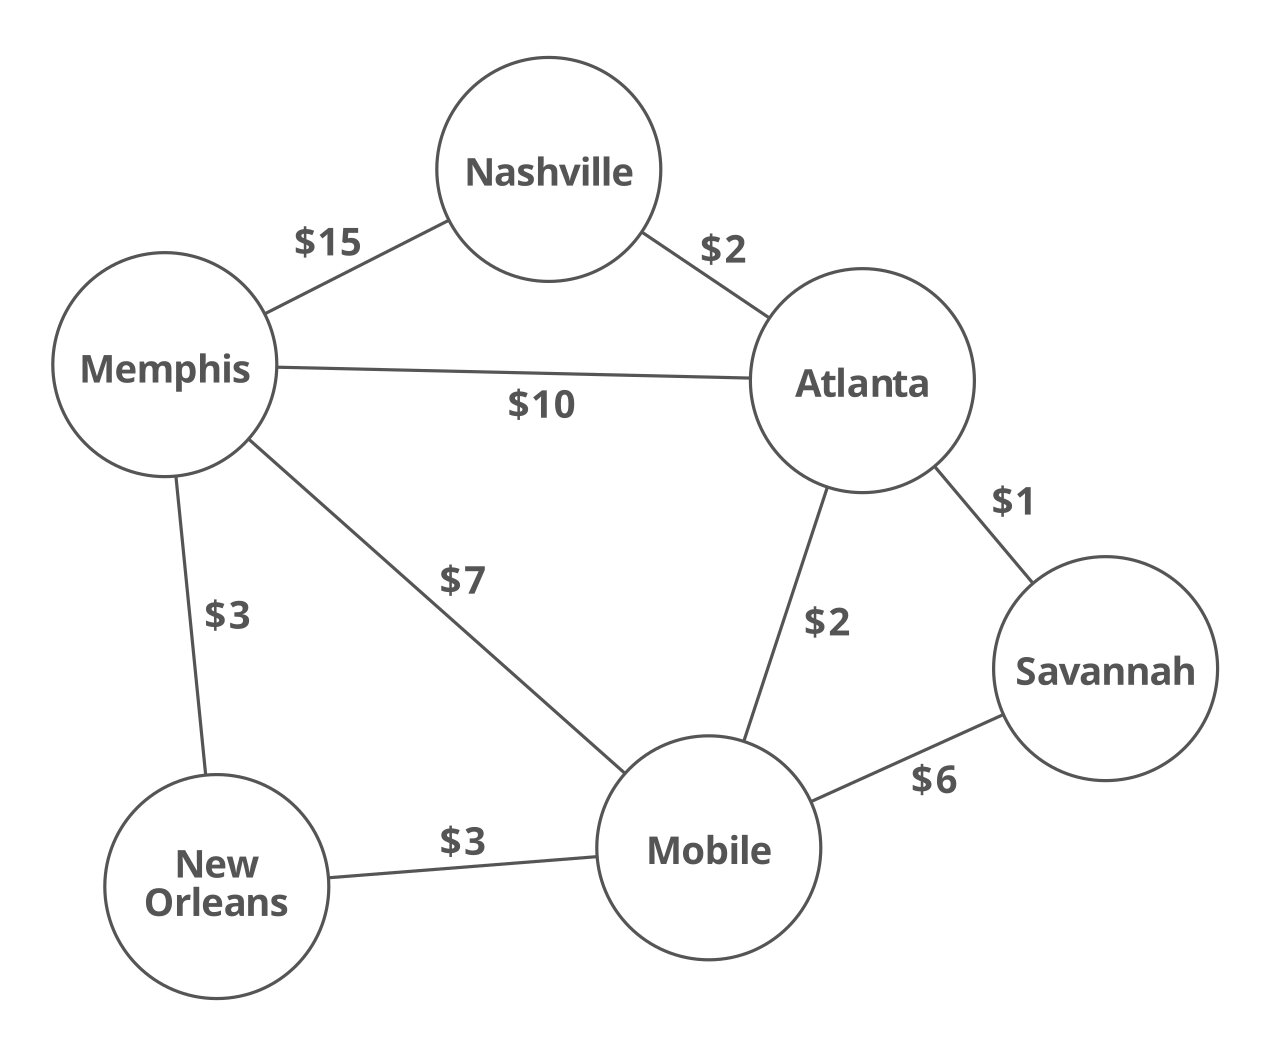

In [121]:
print('Given the following graph, what is the cheapest way to fly from Memphis to Nashville?')
Image('dijkstras_algorithm_travel_graph.jpg', width=500)

## Priority Queue
Dijkstra's algorithm makes use of priority queue, a data type we have not yet seen. Priority queue is an abstract data type that stores an item with priority and supports efficiant insertion and retrieval. It is usually implemeneted by the data structure binary heap, which supports operations on an input or heap with $n$ elements:
- build_heap(a_list): build an heap in $O(n)$ time
- extract_min(): extract the key with minimum value in the queue in $O(\log n)$ time of the queue
- decrease_key(id, v): decrease the key for id to v in $O(\log n)$ time of the queue. Here 'key' means the value associated with an id in the priority queue.


There are various way to implement priority queues to support Dijkstra's algorithm in Python: 
1. dictionary + array (heapq): cross-linking the dictionary's id with the id in the min heap
2. array (heapq): the simpliest, shown in example below.
3. build a class yourself: the most complicated.

### Pseudo code

    Add the starting vertex s to the initially empty min heap with priority value 0
    Add all other vertices to the heap with priority value of infinity
    While the heap is not empty:
       Remove the vertex in the heap with the minimum priority.
           We'll call this vertex u.
           Its priority is the shortest distance from s to u.
       For each of u's neighbors v:
           If v is not already in the heap, do nothing.
                (We've already found the shortest distance from s to v.)
           Otherwise, update v's predecessor to u, and update its priority value to the minimum of:
               Its current priority value, or
               The shortest distance from s to u + the weight of the edge (u, v)
The shortest distance from the starting vertex to all other vertices is stored in the heap when the algorithm is terminated.

Visualization: https://codepen.io/mit6006/pen/BqgXWM

### Runtime analysis: 

For simplicity, we assume input graph already pruned to contain only vertices reachable from start_node. We also assume using binary heaps.
1. We performed build_heap() on all nodes in $|V|$ time
2. We perform $O(|E|)$ updates of distance estimates each in $O(\log n)$ time. The $O(|E|)$ comes from the fact that we visit each node exactly once and consider all its outgoing edges, .
3. We perform $O(|V|)$ extract_min (each in $O(\log n)$ time) since we viist exactly each node once. 

Total runtime: $O((|V|+|E|)\log |V|)$ time. Fibonacci heap can reduce it to $O(|E|+|V|\log |V|)$ in ammortized case. 

In [44]:
def dijkstra(adj_list, start_node):
    
    # initialize to infinity a distance table representing the cheapest cost to get to from start_node
    cost_to_get_to = {node: float('inf')  for node in adj_list}
    cost_to_get_to[start_node] = 0
 
    # dequeued nodes for backtracking solution
    visited = set()
    import heapq
    priority_queue = []
    # push tuple (value, key) into the priority queue
    heapq.heappush(priority_queue, (0, start_node))
    
    while priority_queue:
        # pop the priority queue from the cheapest node to the most expensive 
        cheapest_cost, cheapest_node = heapq.heappop(priority_queue)
        
        # similar to visisted in BFS
        visited.add(cheapest_node)
        
        # consider its neighbors
        for neighbor, neighbor_cost in adj_list[cheapest_node]:
            # if we have considered neighbor before, we can safely skip it!
            if neighbor in visited:
                continue
            
            # relaxation: update the cheapest cost if we found a better path to cheapest_node via neighbor edge
            # i.e. compare 
            # cost(start_node, cheapest_node) 
            # vs 
            # cost(start_node, neighbor) + cost(neighbor, cheapest_node)
            # optimal substructure in DP problems: subpaths of shortest paths are shortest paths
            print('Before update: cost({}, {}) = {} vs cost({}, {}) + cost({}, {}) = {} + {}'.format(
                start_node, neighbor, cost_to_get_to[neighbor], start_node, cheapest_node, 
                cheapest_node, neighbor, cheapest_cost, neighbor_cost))
            if cost_to_get_to[neighbor] > cheapest_cost + neighbor_cost:
                cost_to_get_to[neighbor] = cheapest_cost + neighbor_cost
                print('After update: cost({}, {}) = {} vs cost({}, {}) + cost({}, {}) = {} + {}'.format(
                    start_node, neighbor, cost_to_get_to[neighbor], start_node, cheapest_node, 
                    cheapest_node, neighbor, cheapest_cost, neighbor_cost))
                # update best path
                path[neighbor] = cheapest_node

                # Update the cost to reach this node in the priority queue
                # repeat is fine, because only the lowest cost will be used if needed
                heapq.heappush(priority_queue, (cost_to_get_to[neighbor],  neighbor))
                print(priority_queue)
                print()
            
    return path, cost_to_get_to

# backtrack the shortest path we have found
def backtrack_path(path, dest, start):
    from collections import deque
    best_path = deque([dest])
    node = dest         
    while node != start:
        node = path[node]
        best_path.appendleft(node)
    return best_path
         

In [127]:
                      


adj_list = {'Memphis': [('New Orleans', 3), ('Mobile', 7), ('Atlanta', 10), ('Nashville', 15)],
            'New Orleans': [('Mobile', 3), ('Memphis', 3)],
            'Mobile': [('Atlanta', 2), ('Savannah', 6), ('Memphis', 7), ('New Orleans', 3)],
            'Savannah': [('Atlanta', 1), ('Mobile', 6)],
            'Atlanta': [('Nashville', 2), ('Savannah', 1), ('Nashville', 2)],
            'Nashville': [('Memphis', 15), ('Atlanta', 2)]
           }
start_node = 'Memphis'
end_node = 'Nashville'
path, best_cost = dijkstra(adj_list, start_node)


Before update: cost(Memphis, New Orleans) = inf vs cost(Memphis, Memphis) + cost(Memphis, New Orleans) = 0 + 3
After update: cost(Memphis, New Orleans) = 3 vs cost(Memphis, Memphis) + cost(Memphis, New Orleans) = 0 + 3
[(3, 'New Orleans')]

Before update: cost(Memphis, Mobile) = inf vs cost(Memphis, Memphis) + cost(Memphis, Mobile) = 0 + 7
After update: cost(Memphis, Mobile) = 7 vs cost(Memphis, Memphis) + cost(Memphis, Mobile) = 0 + 7
[(3, 'New Orleans'), (7, 'Mobile')]

Before update: cost(Memphis, Atlanta) = inf vs cost(Memphis, Memphis) + cost(Memphis, Atlanta) = 0 + 10
After update: cost(Memphis, Atlanta) = 10 vs cost(Memphis, Memphis) + cost(Memphis, Atlanta) = 0 + 10
[(3, 'New Orleans'), (7, 'Mobile'), (10, 'Atlanta')]

Before update: cost(Memphis, Nashville) = inf vs cost(Memphis, Memphis) + cost(Memphis, Nashville) = 0 + 15
After update: cost(Memphis, Nashville) = 15 vs cost(Memphis, Memphis) + cost(Memphis, Nashville) = 0 + 15
[(3, 'New Orleans'), (7, 'Mobile'), (10, 'Atlanta

In [128]:
print('Cheapest cost from {} to {}: {}'.format(start_node, end_node, best_cost[end_node]))
print(backtrack_path(path, end_node, start_node))

Cheapest cost from Memphis to Nashville: 10
deque(['Memphis', 'New Orleans', 'Mobile', 'Atlanta', 'Nashville'])


# Practice problems:
1. https://leetcode.com/problems/coloring-a-border/
2. https://leetcode.com/problems/couples-holding-hands/
3. https://leetcode.com/problems/path-with-minimum-effort/
4. https://leetcode.com/problems/couples-holding-hands/